In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
print("Librerías importadas correctamente.")

Librerías importadas correctamente.


In [3]:
try:
    # Cargar los datos desde los archivos CSV
    df_math = pd.read_excel('Student Performance/Maths.xlsx')
    df_por = pd.read_excel('Student Performance/Portuguese.xlsx')

    # Añadir una columna para identificar la materia
    df_math['subject'] = 'Math'
    df_por['subject'] = 'Portuguese'

    # Combinar ambos dataframes en uno solo
    df = pd.concat([df_math, df_por], ignore_index=True)

    print("\nDatos cargados y combinados exitosamente.")
    print(f"Dimensiones del DataFrame combinado: {df.shape}")
    print(f"Total de registros: {df.shape[0]}")
    print(f"Total de columnas: {df.shape[1]}")

except FileNotFoundError:
    print("Error: Asegúrate de que los archivos 'Maths.xlsx - Maths.csv' y 'Portuguese.xlsx - Portuguese.csv' estén en el directorio correcto.")


Datos cargados y combinados exitosamente.
Dimensiones del DataFrame combinado: (1048, 34)
Total de registros: 1048
Total de columnas: 34


In [4]:
print("\n--- 3. Inspección Inicial de los Datos ---")

# Mostrar las primeras 5 filas del dataframe
print("\nPrimeras 5 filas del DataFrame:")
print(df.head())

# Obtener información general del dataframe (tipos de datos, valores no nulos)
print("\nInformación general del DataFrame (df.info()):")
df.info()

# Obtener estadísticas descriptivas para las columnas numéricas
print("\nEstadísticas Descriptivas (variables numéricas):")
print(df.describe().round(2))

# Contar valores nulos por columna
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())
# Nota: No hay valores nulos, lo cual simplifica el análisis


--- 3. Inspección Inicial de los Datos ---

Primeras 5 filas del DataFrame:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 subject  
0        3     4     1     1       3        6   5   6   6    Math  
1        3     3     1     1       3        4   5   5   6    Math  
2        3     2     2     3       3       10   7   8  10    Math  
3        2     2     1     1       5        2  15  14  15    Math  
4        3     2     1     2       5        4   6  10  10    Math  

[5 rows x 34 columns]

Info


--- 4. Generando gráficos de Análisis Univariado ---
Gráfico 'distribucion_numericas.png' guardado.


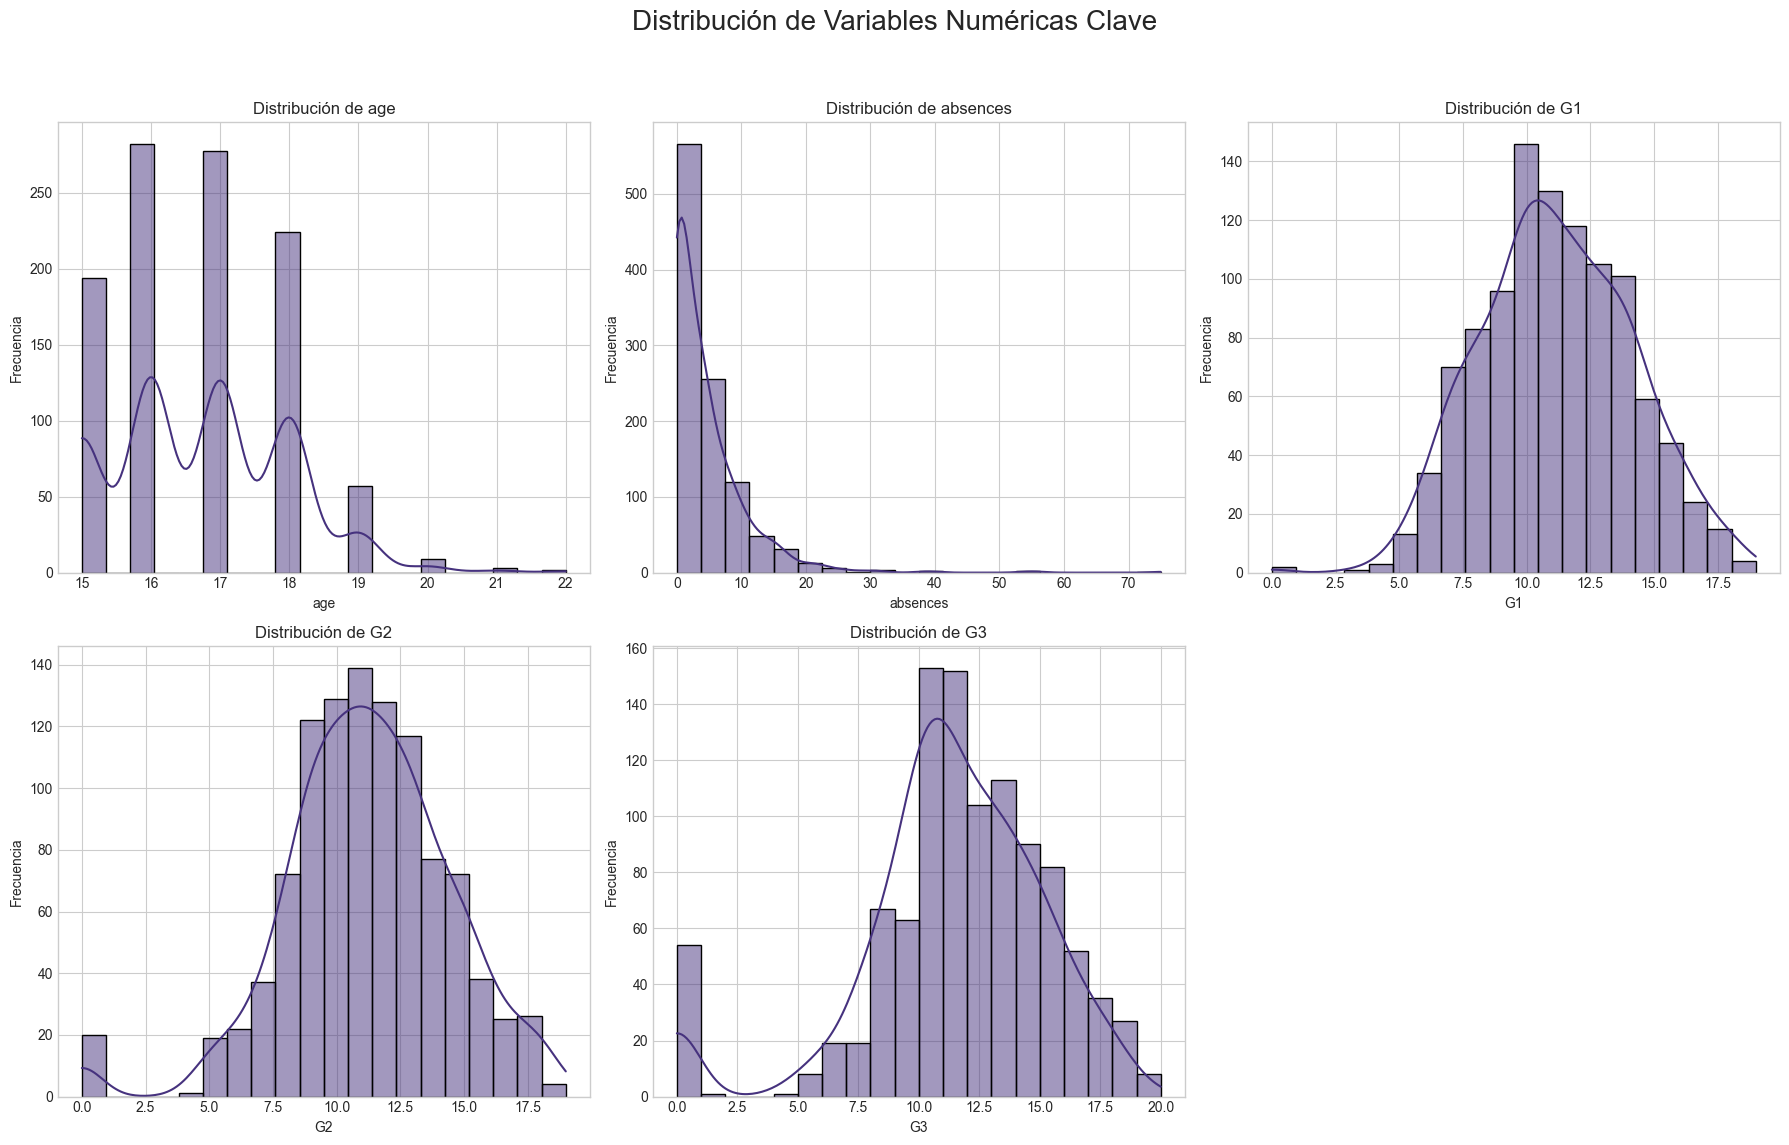

In [5]:
print("\n--- 4. Generando gráficos de Análisis Univariado ---")

# --- Variables Numéricas (Histogramas y Boxplots) ---
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(18, 12))
plt.suptitle("Distribución de Variables Numéricas Clave", fontsize=20)
for i, col in enumerate(['age', 'absences', 'G1', 'G2', 'G3'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("distribucion_numericas.png")
print("Gráfico 'distribucion_numericas.png' guardado.")
plt.show()


--- 5. Generando gráficos de Análisis Bivariado ---
Gráfico 'correlacion_heatmap.png' guardado.


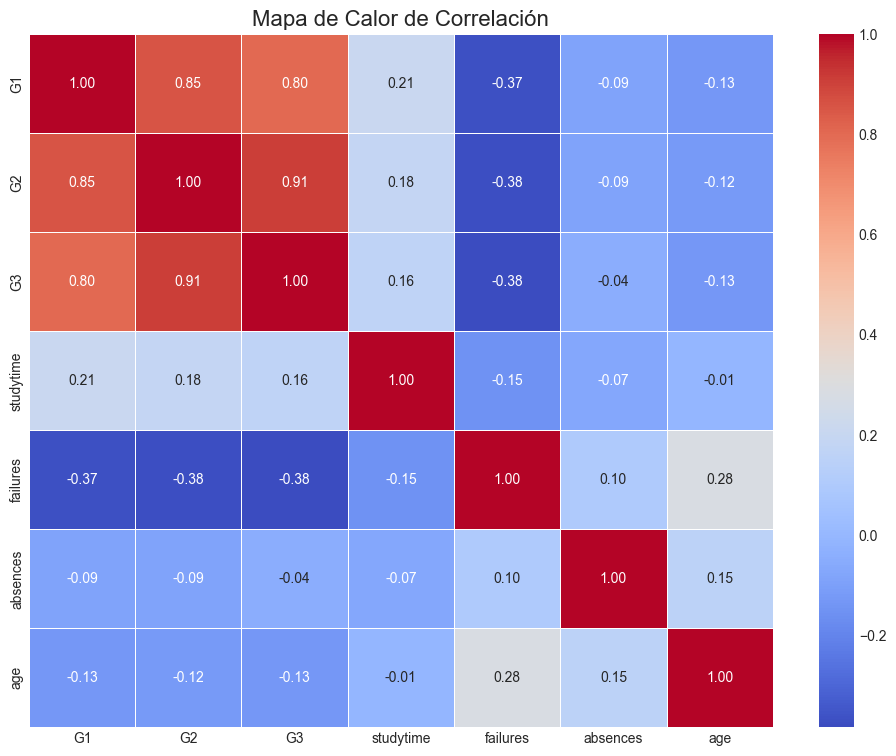

Gráfico 'g1_g2_vs_g3.png' guardado.


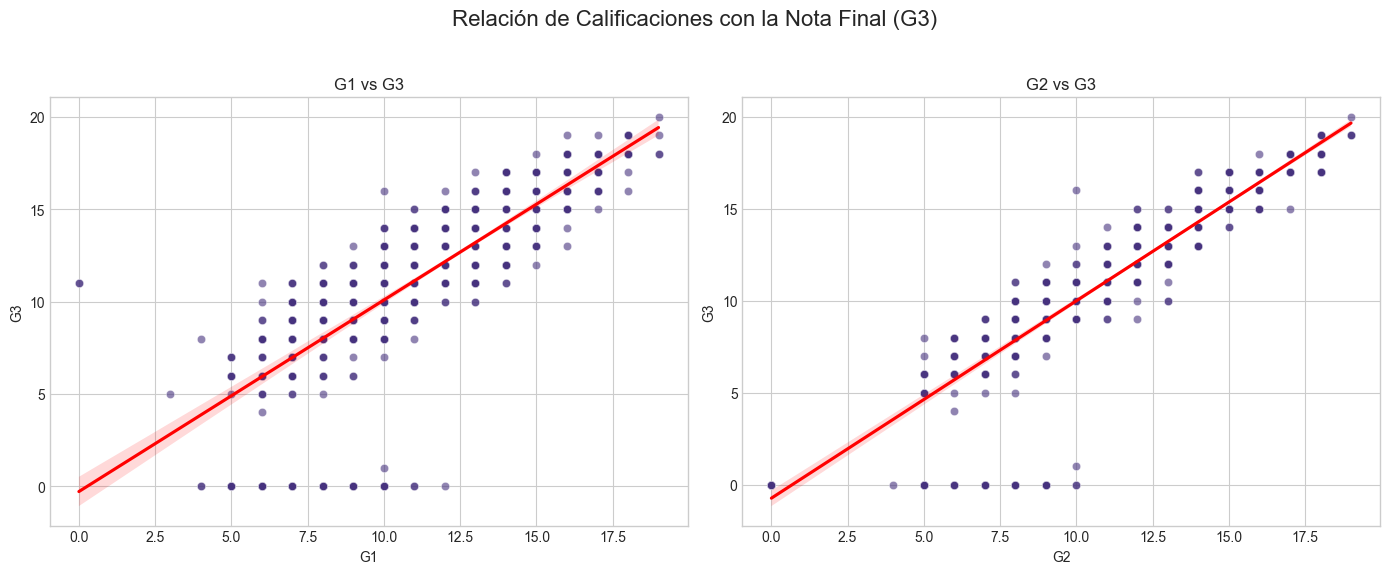

Gráfico 'g3_vs_categoricas.png' guardado.


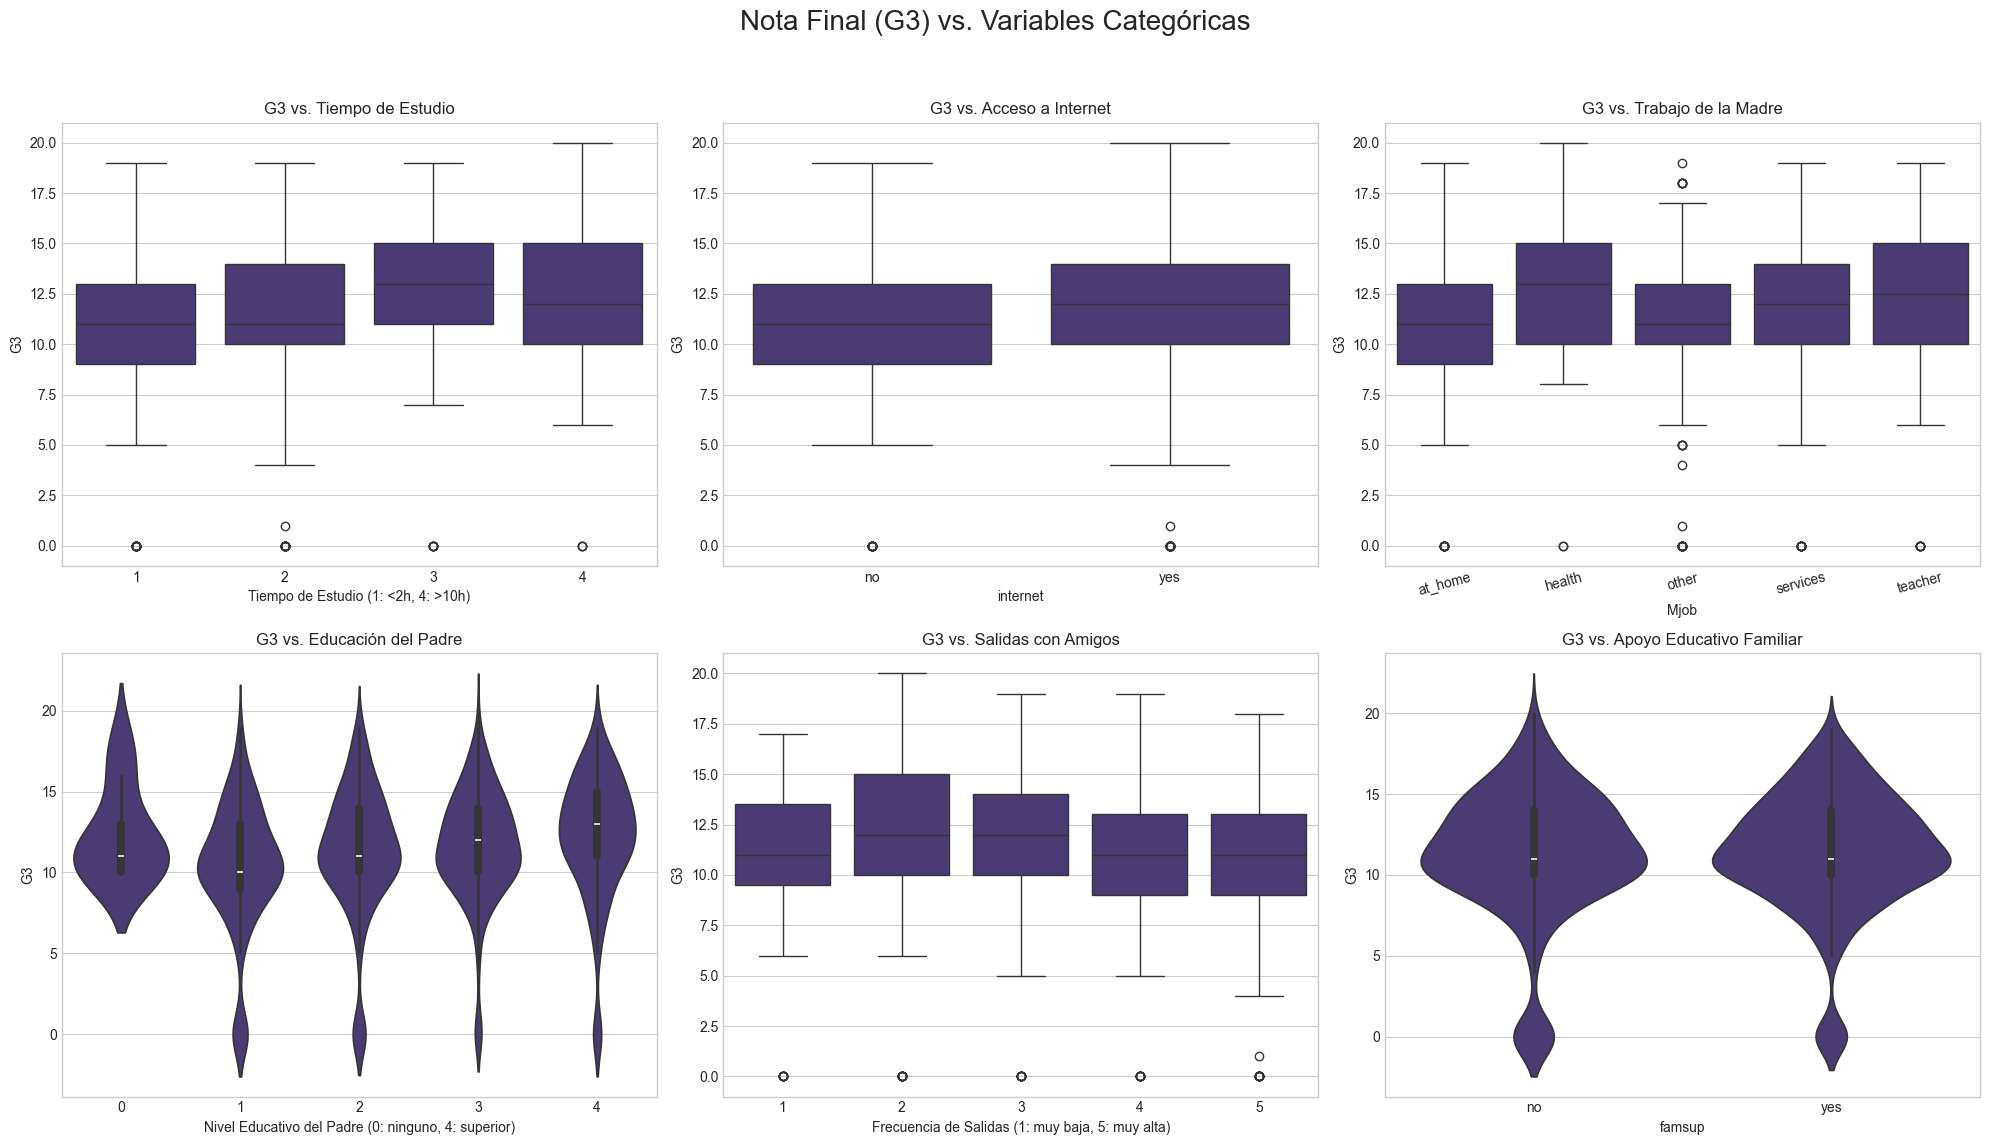


--- Análisis Exploratorio de Datos (EDA) Finalizado ---


In [ ]:
print("\n--- 5. Generando gráficos de Análisis Bivariado ---")

# --- Correlación entre variables numéricas ---
plt.figure(figsize=(12, 9))
corr_matrix = df[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences', 'age']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación', fontsize=16)
print("Gráfico 'correlacion_heatmap.png' guardado.")
plt.show()
# Observación: Fuerte correlación positiva entre G1, G2 y G3.

# --- Relación entre G1, G2 y la nota final G3 ---
plt.figure(figsize=(14, 6))
plt.suptitle('Relación de Calificaciones con la Nota Final (G3)', fontsize=16)
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='G1', y='G3', alpha=0.6)
sns.regplot(data=df, x='G1', y='G3', scatter=False, color='red') # Línea de regresión
plt.title('G1 vs G3')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='G2', y='G3', alpha=0.6)
sns.regplot(data=df, x='G2', y='G3', scatter=False, color='red') # Línea de regresión
plt.title('G2 vs G3')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
print("Gráfico 'g1_g2_vs_g3.png' guardado.")
plt.show()


# --- Relación de la nota final (G3) con variables categóricas ---
plt.figure(figsize=(20, 12))
plt.suptitle('Nota Final (G3) vs. Variables Categóricas', fontsize=20)

# G3 vs. Tiempo de estudio
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='studytime', y='G3')
plt.title('G3 vs. Tiempo de Estudio')
plt.xlabel('Tiempo de Estudio (1: <2h, 4: >10h)')

# G3 vs. Acceso a Internet
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='internet', y='G3')
plt.title('G3 vs. Acceso a Internet')

# G3 vs. Trabajo de la madre
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Mjob', y='G3')
plt.title('G3 vs. Trabajo de la Madre')
plt.xticks(rotation=15)

# G3 vs. Nivel educativo del padre
plt.subplot(2, 3, 4)
sns.violinplot(data=df, x='Fedu', y='G3')
plt.title('G3 vs. Educación del Padre')
plt.xlabel('Nivel Educativo del Padre (0: ninguno, 4: superior)')

# G3 vs. Salidas con amigos
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='goout', y='G3')
plt.title('G3 vs. Salidas con Amigos')
plt.xlabel('Frecuencia de Salidas (1: muy baja, 5: muy alta)')

# G3 vs. Apoyo educativo familiar
plt.subplot(2, 3, 6)
sns.violinplot(data=df, x='famsup', y='G3')
plt.title('G3 vs. Apoyo Educativo Familiar')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n--- Análisis Exploratorio de Datos (EDA) Finalizado ---")